## Regression

### this fucntion creates a data smaple randmoly 

In [2]:
# %matplotlib notebook
import pandas as pd
import numpy as np
%matplotlib inline


np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


### data is split - to train and test 

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


### plotting data using Matplotlib 

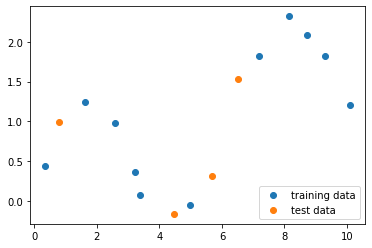

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4)


### Question 1.1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

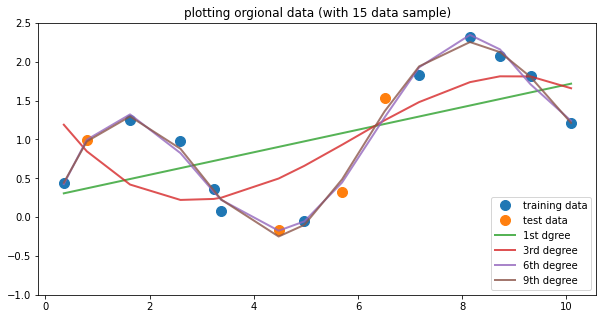

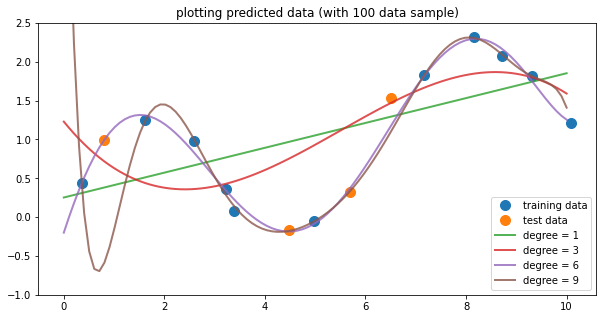

(4, 100)

In [2]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    import matplotlib.pyplot as plt
    
    # define degreee [poly = PolynomialFeatures(degree=?) ]
    # reshaped [x.reshape(-1,1)]
    # fitting and transform data
    
    
    Degrees = [1, 3, 6, 9]
    N = 100
    Degrees_list = ['1st dgree', '3rd degree', '6th degree', '9th degree']
    predicted_Y_15 = np.zeros([len(Degrees), x.size])
    predicted_y_100 = np.zeros([len(Degrees), N])
    predict = np.linspace(0, 10, N).reshape(-1, 1)


    for i, deg in enumerate(Degrees):
        poly = PolynomialFeatures(degree=deg)
        X_poly = poly.fit_transform(X_train.reshape(-1, 1))
        predict_ = poly.fit_transform(predict)
        predicted_y_100[i, :] = LinearRegression().fit(X_poly, y_train).predict(predict_)
    

    for i, deg in enumerate(Degrees):  
        poly = PolynomialFeatures(degree= deg)
        X_poly = poly.fit_transform(x.reshape(-1,1))
        predicted_Y_15[i, :]  = LinearRegression().fit(X_poly, y).predict(X_poly)
        
    


    plt.figure(figsize=(10,5))
    plt.title("plotting orgional data (with 15 data sample)")
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)

    for i, deg in enumerate(Degrees_list): 
        plt.plot(x,predicted_Y_15[i,:], alpha=0.8, lw=2,
        label=deg)

    plt.legend(loc=4);
    plt.ylim(-1,2.5)
    plt.legend(loc=4)
    plt.show()


    plt.figure(figsize=(10,5))
    plt.title("plotting predicted data (with 100 data sample)")
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), predicted_y_100[i], alpha=0.8, lw=2, 
        label='degree = {} '.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)
    plt.show()



    return predicted_y_100.shape

answer_one()


### Fitted model plot

### Question 1.2
Comment on the figure above

### Quick note on $R^2$-score:
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$-score of 0.0.

### Question 2
Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [3]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score


    Degrees = np.arange(0,10)

    #np.random.seed(0)
    #n = N = 150
    #x = np.linspace(0,25,n) + np.random.randn(n)/15
    #y = np.cos(x)+x/5 + np.random.randn(n)/10

    R_2_train = np.zeros([len(Degrees)])
    R_2_test = np.zeros([len(Degrees)])


    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

    
    for i,deg in enumerate(Degrees):
        poly = PolynomialFeatures(degree= deg)
        X_poly_train = poly.fit_transform(X_train.reshape(-1,1))
        X_poly_test = poly.fit_transform(X_test.reshape(-1,1))

        predicted_y_train  = LinearRegression().fit(X_poly_train, y_train).predict(X_poly_train)
        predicted_y_test  = LinearRegression().fit(X_poly_train, y_train).predict(X_poly_test)
        #dont fit using test data :) 
        
        R_2_train[i] = r2_score(y_train ,predicted_y_train)
        R_2_test[i] = r2_score(y_test ,predicted_y_test)



    return   R_2_train,R_2_test;
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247953, -0.64525322]))

### Question 3
Plot $R^2$ scores at degrees from 0 to 9.

Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

In [4]:
def answer_three():
    R2_train, R2_test = answer_two()

    Degrees = np.arange(0,10)
    merged_scores = list(zip(R2_train,R2_test,Degrees))
    R2_train_sorted = np.sort(R2_train)
    R2_test_sorted = np.sort(R2_test)

    underfitting = 0
    overfitting = 0
    generalized = 0

    R2_train_sorted = np.sort(R2_train)
    R2_test_sorted = np.sort(R2_test)


    for deg, score in enumerate(merged_scores):

        if score[0] < R2_train_sorted[5] and score[1] < R2_test_sorted[5]:
            #
            underfitting = deg

        if score[0] >= R2_train_sorted[5] and score[1] < R2_test_sorted[5]:
            overfitting = deg

        if score[0] >= R2_train_sorted[5] and score[1] >= R2_test_sorted[7]:
            generalized = deg


    return merged_scores[underfitting], merged_scores[overfitting], merged_scores[generalized] ;


answer_three()
    

((0.5871995368779847, 0.005331052945740433, 3),
 (0.9980370625665138, -0.645253216177847, 9),
 (0.9935250927840416, 0.9202150411139083, 7))

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

**Comment on the results**

In [5]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

    poly = PolynomialFeatures(degree=12)
    X_poly_tain = poly.fit_transform(X_train.reshape(-1,1))
    X_poly_test = poly.fit_transform(X_test.reshape(-1,1))


    Lin_reg =LinearRegression().fit(X_poly_tain,y_train)
    predicted_y_test_poly = Lin_reg.predict(X_poly_test)

    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_poly_tain, y_train)
    predicted_y_test_lasso = linlasso.predict(X_poly_test)

    R2_lin = r2_score(y_test,predicted_y_test_poly)
    R2_lasso = r2_score(y_test,predicted_y_test_lasso)


    return R2_lin,R2_lasso;
answer_four()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


(-4.311955012614152, 0.8406625614750236)

### Question 5
Calculate total mean square error.
$$
MSE = *E[ (ytrue  - yhat)^2 ] 
$$

Then compare your results with scikit-learn implementation of mean square error.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X_train.reshape(-1, 1))
predict_ = poly.fit_transform(y.reshape(-1,1))
predicted_y = LinearRegression().fit(X_poly, y_train).predict(predict_)



def mse(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    size = y_true.size
    sum = 0
    for i in range(0,size):
        diff = y_true[i] - y_pred[i]
        diff_squared = diff ** 2
        sum += diff_squared
        total_square_err = sum
        MSE = sum / y_true.size
        
        skleanr_mean = mean_squared_error(y_true ,y_pred , squared= True)

    return total_square_err, MSE, skleanr_mean ;

result = mse(y ,predicted_y)

print("MSE function above returns the total errors as if they wern't divided by n \n")
print("the functon MSE returns \n1- total mean err = {} ".format(result[0]))
print("2- total mean err / #of data = {}  " .format(result[1]))
print("3- skleanr function for mean error = {} ".format(result[2]))

MSE function above returns the total errors as if they wern't divided by n 

the functon MSE returns 
1- total mean err = 4.2441122313204875 
2- total mean err / #of data = 0.28294081542136584  
3- skleanr function for mean error = 0.28294081542136584 


### Question 6
Implement a linear regression class that can be used by one of the following three optoins (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression,Ridge

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
poly = PolynomialFeatures(degree=7)
X_poly_tain = poly.fit_transform(X_train.reshape(-1,1))
X_poly_test = poly.fit_transform(X_test.reshape(-1,1))


print("1. Ordinary Linear Regression Class \n2. Implement Ridge Regression Class \n3. Implement Lasso Regression Class \n choose your reg_mode")
mode = input()


if (mode == '1'):
     reg_mode =LinearRegression().fit(X_poly_tain,y_train)
if (mode == '2'):
    reg_mode = Lasso(alpha=0.01, max_iter = 10000).fit(X_poly_tain, y_train)
if (mode == '3'):
    reg_mode = Ridge(alpha=0.01, max_iter = 10000).fit(X_poly_tain, y_train)



print('\nR-squared score (training): {:.3f}'
     .format(reg_mode.score(X_poly_tain, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(reg_mode.score(X_poly_test, y_test)))






1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class 
3. Implement Lasso Regression Class 
 choose your reg_mode

R-squared score (training): 0.852
R-squared score (test): 0.687



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.975e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


### Part 2
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [8]:
#pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


In [9]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

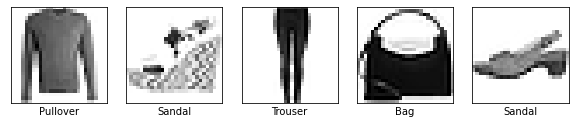

In [10]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 7
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [11]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

In [12]:

def evaluate_learners(classifiers, Xs, Ys):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    ########## write your code here ##############
    CV_train_scores = np.zeros((2,5))
    CV_test_scores  = np.zeros((2,5))
    classfier = classifiers
    X_folds = Xs 
    Y_folds = Ys
    j = 0
    for clf in classfier :

        model = cross_validate(clf, X_folds ,Y_folds, cv=5, scoring=('accuracy'), return_train_score=True)
        CV_train_scores_array = model['train_score']
        CV_test_scores_array = model['test_score']

        for i, val in enumerate(CV_train_scores_array):
            CV_train_scores[[j],[i]] = val

        for i, val in enumerate(CV_test_scores_array):
            CV_test_scores[[j],[i]] = val

        j=1
            
    return CV_train_scores,CV_test_scores ;


# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.

With this small sample of our data we can now train and evaluate the two classifiers.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
warnings.warn('ConvergenceWarning')
warnings.warn('Do not show this message')


minmax_logistic = make_pipeline(MinMaxScaler(), LogisticRegression())
#standarized_Logistic = make_pipeline(StandardScaler(), LogisticRegression())

classifiers_minmax = [KNeighborsClassifier(n_neighbors=5), minmax_logistic]
train_scores_minmax, test_scores_minmax = evaluate_learners(
    classifiers_minmax, Xs, ys)


#classifiers_standarized = [KNeighborsClassifier(n_neighbors=5),standarized_Logistic]
#train_scores_standarized, test_scores_standarized = evaluate_learners(classifiers_standarized, Xs, ys)


Print train scores and test scores.

In [14]:
print("classifiers_minmax train scores are :\n", train_scores_minmax)
print("classifiers_minmax test scores are :\n", test_scores_minmax)
#print("classifiers_standarized train scores are :\n", train_scores_standarized)
#print("classifiers_standarized test scores are :\n", test_scores_standarized)


classifiers_minmax train scores are :
 [[0.86589286 0.86321429 0.865      0.86553571 0.86517857]
 [0.92410714 0.92071429 0.91857143 0.9175     0.91428571]]
classifiers_minmax test scores are :
 [[0.81357143 0.80071429 0.80785714 0.81428571 0.81642857]
 [0.81785714 0.81785714 0.82785714 0.82714286 0.83857143]]


### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 8
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [22]:
from sklearn.model_selection import GridSearchCV

classifiers=[LogisticRegression(),KNeighborsClassifier()]

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, cv=5, return_train_score=True).fit(Xs, ys)
                 for clf, grid in zip(classifiers, grids)]


In [ ]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['Alpha','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)

NameError: name 'plt' is not defined

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [16]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [17]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)


array([[145,   2,   2,   9,   2,   0,  11,   0,   4,   0],
       [  0, 167,   3,   4,   0,   0,   1,   0,   0,   0],
       [  1,   0, 113,   2,  32,   0,  25,   0,   2,   0],
       [ 12,   3,   0, 150,   5,   0,   5,   0,   0,   0],
       [  0,   0,  13,  11, 141,   0,   9,   0,   1,   0],
       [  0,   0,   0,   0,   0, 131,   0,  22,   1,  21],
       [ 37,   1,  27,   7,  25,   0,  75,   0,   3,   0],
       [  0,   0,   0,   0,   0,   2,   0, 161,   0,  12],
       [  1,   0,   1,   3,   1,   0,   5,   1, 163,   0],
       [  0,   0,   0,   0,   0,   2,   0,   9,   0, 164]], dtype=int64)

### Question 9
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

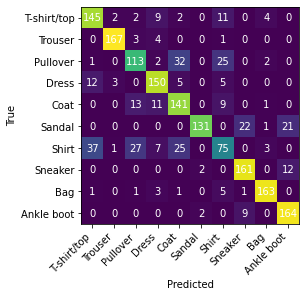

In [20]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 10
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [ ]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:**

### Why do you get multiple plots per model? 
    ---to tune the hyper param. and find which parameters is better (performs much better )
### What do the features represent in your data. 
    ---dimensions or axies
### Does it seems like the models pay attention to the right features?
    ---it's about the weight of the feature
### Do you models seem to ignore certain features? 
    ---if the feature is useless it will have no effect 
    ---u can choose to ignore it or leave it 
### Do you observe differences in quality between the different classes?

### Question 11
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

In the cell below replace the ####### with your trained models with different alphas.

In [ ]:
plot_coefficients(#############,"Underfitting logistic regression")
plot_coefficients(#############,"Good fit logistic regression")
plot_coefficients(#############,"Overfitting logistic regression")

**Answer:**